# Random Forest


## Imports


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
from util import *
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ,f1_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate

NUM_FOLDS = 10


In [5]:
model_name = 'Random Forest'

## Read the data


### Train Data


In [6]:
training_size = 100000

In [7]:
X, y = get_train_data(path='../data/train_pca_20.csv',training_size=training_size)

In [8]:
# standardize the data
X = standardize_features(X)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model


In [22]:
clf = RandomForestClassifier(max_depth=50,random_state=0, n_estimators=50, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
cv_results = cross_validate(clf, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())
print('f1_weighted: ', cv_results['test_f1_weighted'].mean())


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Paral

accuracy:  0.9016499999999998
f1_macro:  0.5415581618967599
f1_micro:  0.9016499999999998
f1_weighted:  0.8662641785086276


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [23]:
rf_predictions = clf.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

print("Classification Report:")
print(classification_report(y_val, rf_predictions))

Random Forest Accuracy: 0.90355
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     18018
           1       0.60      0.08      0.14      1982

    accuracy                           0.90     20000
   macro avg       0.76      0.54      0.54     20000
weighted avg       0.88      0.90      0.87     20000



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


   feature  importance
0     pca0    0.166630
1     pca1    0.045784
12   pca12    0.044631
6     pca6    0.044571
17   pca17    0.044258
7     pca7    0.044225
2     pca2    0.044187
15   pca15    0.044186
4     pca4    0.044006
18   pca18    0.043873
10   pca10    0.043797
11   pca11    0.043700
5     pca5    0.043604
19   pca19    0.043540
3     pca3    0.043531
8     pca8    0.043445
14   pca14    0.043056
9     pca9    0.043046
13   pca13    0.043001
16   pca16    0.042929


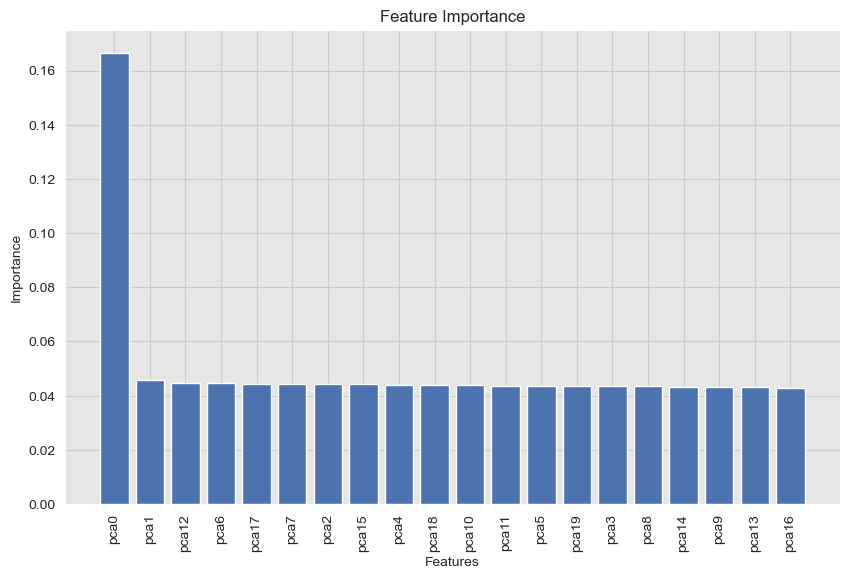

In [24]:
# Get the feature importance
importance = clf.feature_importances_

feature_importance = get_feature_importance(
    features=X_train.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Random Forest')
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


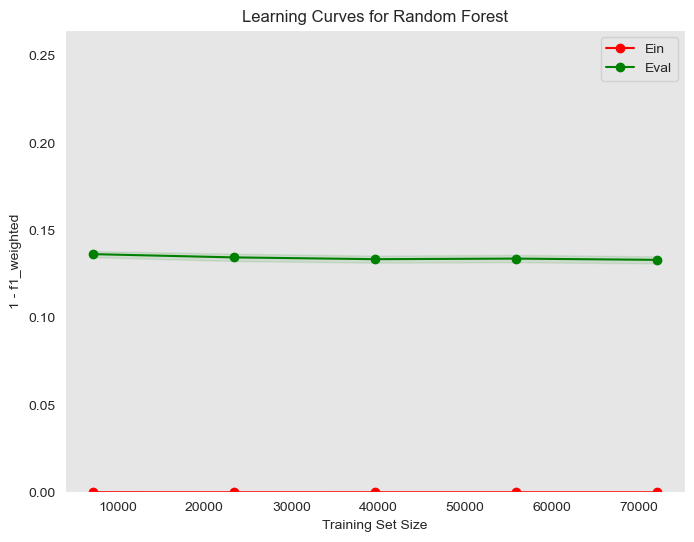

In [25]:
plt = get_learning_curve_plot(estimator=RandomForestClassifier(max_depth=50,random_state=0, n_estimators=50, n_jobs=-1,), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='Random Forest')
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0

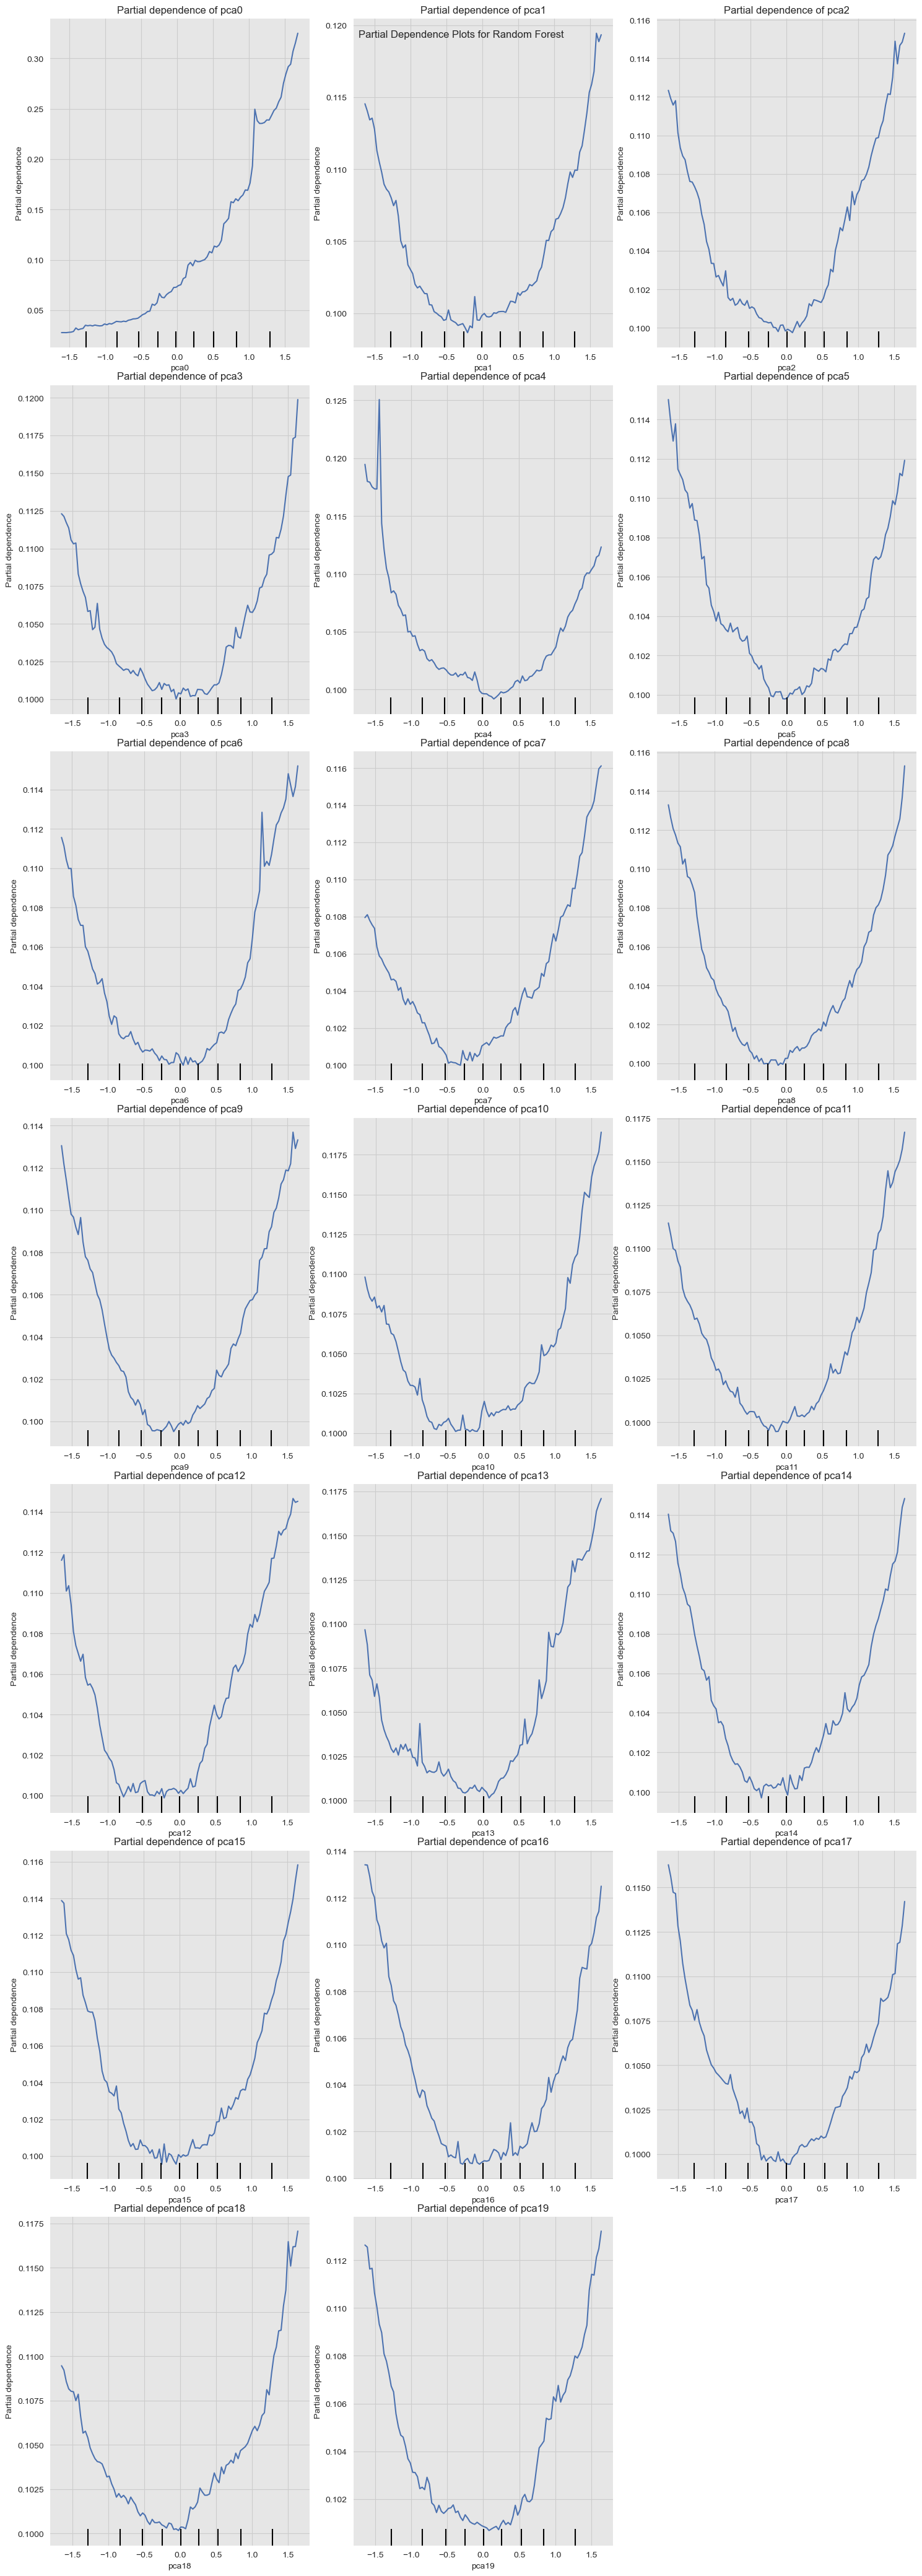

In [33]:
plt = get_partial_dependencies_plot(clf, X_train, modelname='Random Forest')
plt.show()


### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


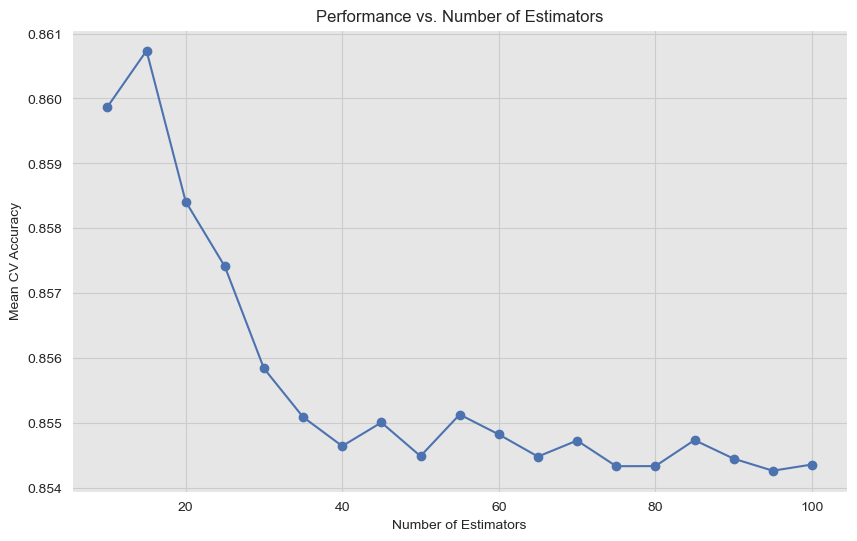

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
# Define a range of n_estimators values to try
estimator_range = range(10, 101, 5)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Perform cross-validation for each value of n_estimators
for estimator in estimator_range:
    random_forest = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=estimator,max_depth=50)
    scores = cross_val_score(random_forest, X_train, y_train, cv=NUM_FOLDS, scoring='f1_weighted')
    # print("Scores:", scores)
    cv_scores.append(scores.mean())

# Plot the performance curve
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean CV Accuracy')
plt.title('Performance vs. Number of Estimators')
plt.grid(True)
plt.savefig(f'../images/{model_name}/number_estimators_effect.png', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    # "criterion": ['gini', 'entropy', 'log_loss']
    'max_depth': [10, 20, 50],
}


### Grid Search


In [13]:
# read the test data
X_test,y_test = get_test_data(path='../data/train_pca_20.csv',test_size=200000-training_size)

In [14]:
grid_search = get_grid_search(estimator=RandomForestClassifier(random_state=0, n_jobs=-1,
), param_grid=param_grid, X=X, y=y, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))


Best parameters found: {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 20}
Best score found: 0.8689608050329838
Test score with best parameters: 0.8702894906522104


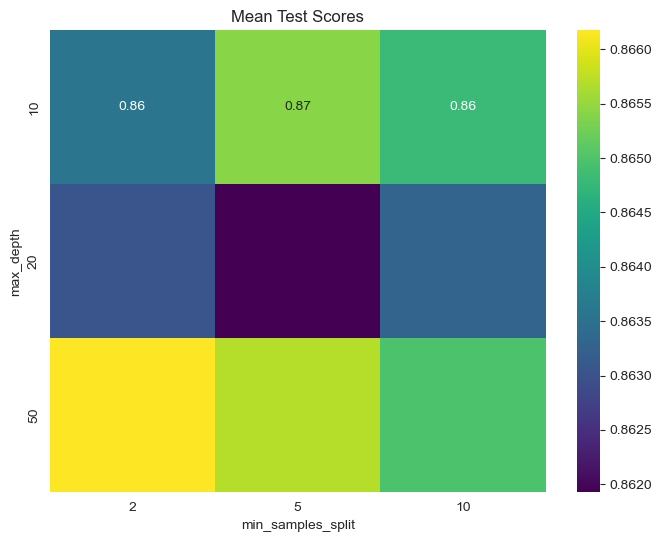

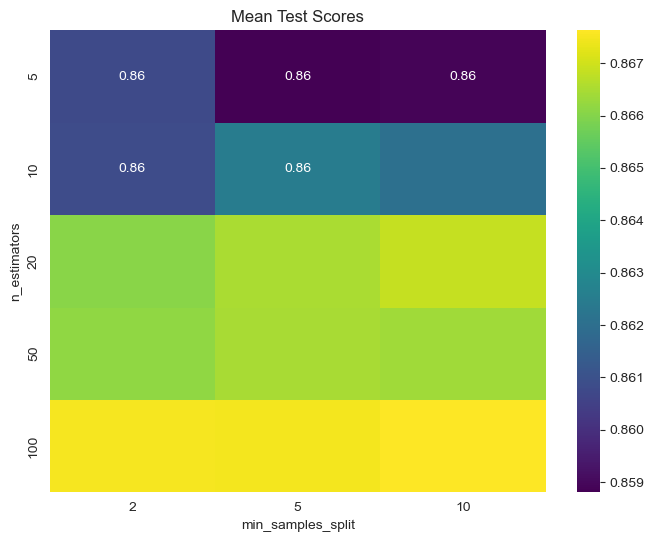

In [15]:
# Get the results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Prepare the hyperparameter values for plotting
param_values_n_estimators = param_grid['n_estimators']
param_values_max_depth = param_grid['max_depth']
param_values_min_samples_split = param_grid['min_samples_split']

# Reshape the mean test scores for plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(param_values_n_estimators), len(param_values_max_depth), len(param_values_min_samples_split))

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=0), annot=True, cmap='viridis', xticklabels=param_values_min_samples_split, yticklabels=param_values_max_depth)

# Set labels and title
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Mean Test Scores')

# save the plot
plt.savefig(f'../images/{model_name}/mean_test_scores_1.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=1), annot=True, cmap='viridis', xticklabels=param_values_min_samples_split, yticklabels=param_values_n_estimators)

# Set labels and title
plt.xlabel('min_samples_split')
plt.ylabel('n_estimators')
plt.title('Mean Test Scores')

# save the plot
plt.savefig(f'../images/{model_name}/mean_test_scores_2.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [16]:
# Add best params
best_params = {
    # 'max_depth': 50,
    "random_state": 0, 
    "n_jobs":-1,
    **grid_search.best_params_
}

accuracy:  0.9007200000000001
f1_macro:  0.5564149575640409
f1_micro:  0.9007200000000001
Accuracy Score of RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=20,
                       n_jobs=-1, random_state=0) is: 0.89923


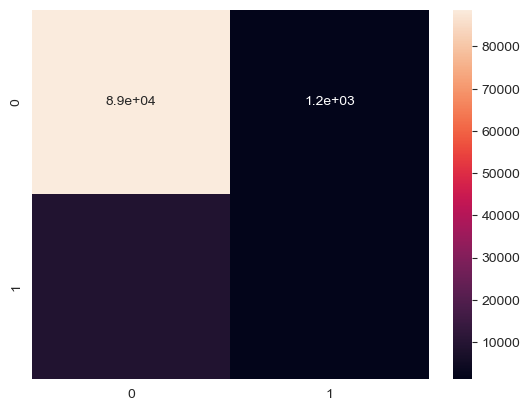

Classification Report of RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=20,
                       n_jobs=-1, random_state=0) is: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     89917
           1       0.50      0.12      0.19     10083

    accuracy                           0.90    100000
   macro avg       0.71      0.55      0.57    100000
weighted avg       0.87      0.90      0.87    100000

F1 Score of RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=20,
                       n_jobs=-1, random_state=0) is: 0.8702961010835913


In [17]:
clf = RandomForestClassifier(**best_params)


# best paramters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
# train the xgb_model
clf.fit(X, y)
# validate the clf
cv_results = cross_validate(clf, X, y, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

# predict the validation set
y_pred = clf.predict(X_test)

# Accuracy Score
print("Accuracy Score of " + str(clf) + " is: " + str(accuracy_score(y_test, y_pred)))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
# save the plot
plt.savefig(f'../images/{model_name}/evaluation_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
# Classification Report
print("Classification Report of " + str(clf) + " is: \n" + str(classification_report(y_test, y_pred)))

# Weighted F1 Score
print("F1 Score of " + str(clf) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))

### Heatmap


<module 'matplotlib.pyplot' from 'c:\\Users\\peter\\miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

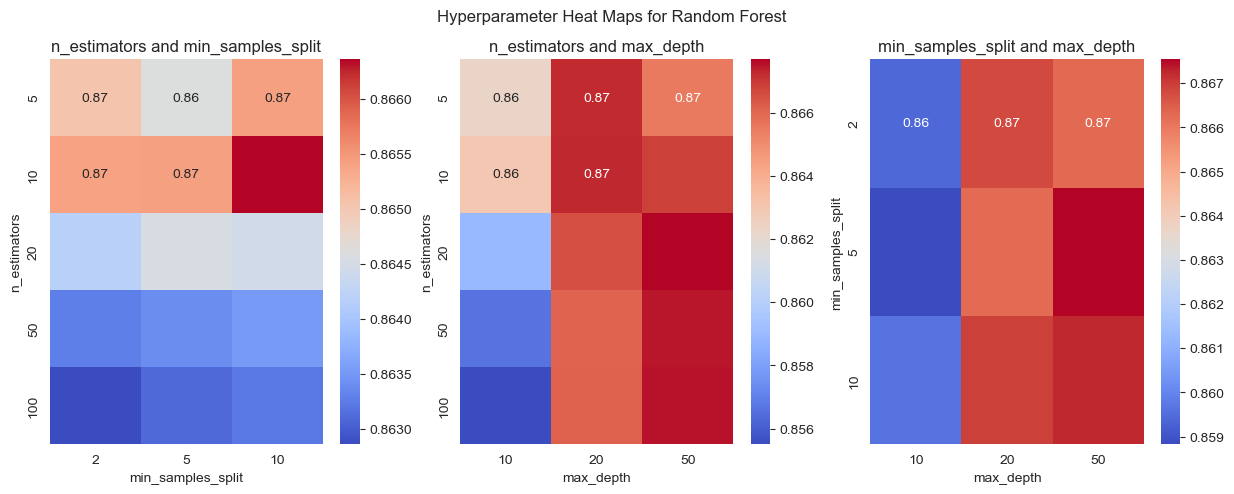

In [18]:
plot_hyper_param_heat_maps(param_grid, grid_search, modelname='Random Forest')


### Train-Validation Curve


Value [5, 10, 20, 50, 100]


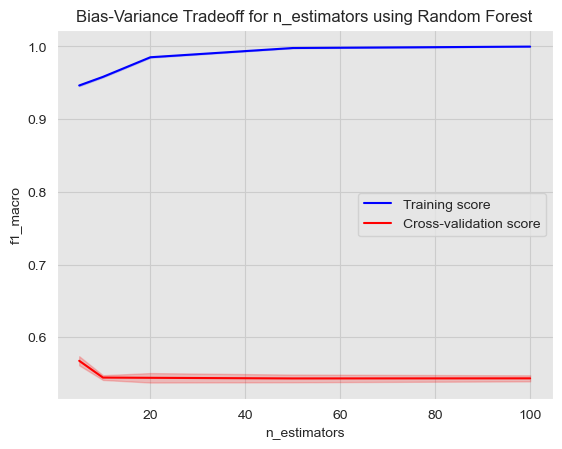

Value [2, 5, 10]


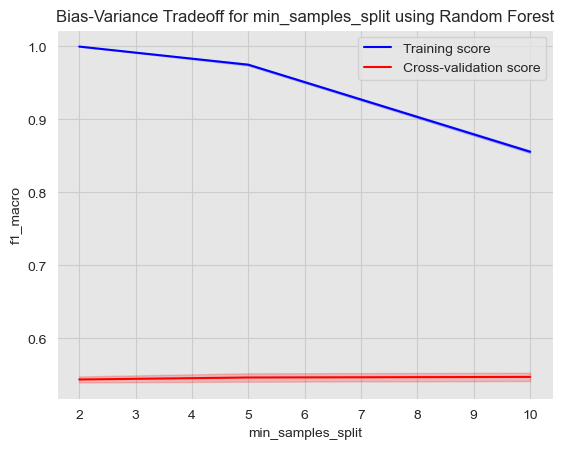

Value [10, 20, 50]


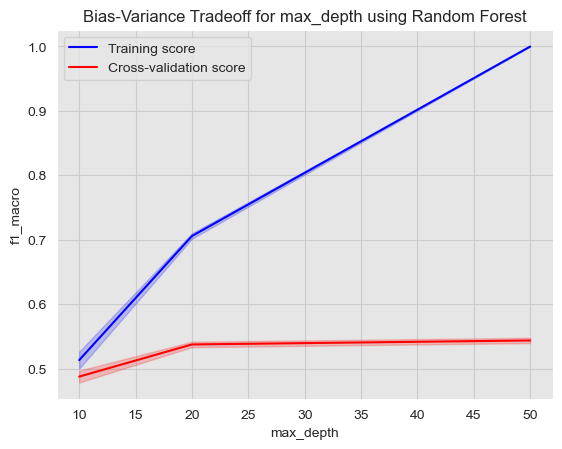

In [19]:

plot_hyper_param_train_validation_curve(estimator=RandomForestClassifier(random_state=0, n_jobs=-1,),
                                        param_grid=param_grid, X=X, y=y, cv=NUM_FOLDS, scoring='f1_macro', modelname='Random Forest')


## Bias-Variance Analysis


In [20]:
clf = RandomForestClassifier(**best_params)
mse, bias, var = get_bias_variance(
    clf, X_train=X, y_train=y, X_test=X_test, y_test=y_test)


In [21]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)
print("Eout estimate: ", bias+var)


mse:  0.10085995
bias:  0.08931127525000002
var:  0.011548674750000005
Eout estimate:  0.10085995000000002


### Tree Plot

A tree plot shows the structure of the decision trees used in the random forest. It can be used to understand how the model makes predictions.


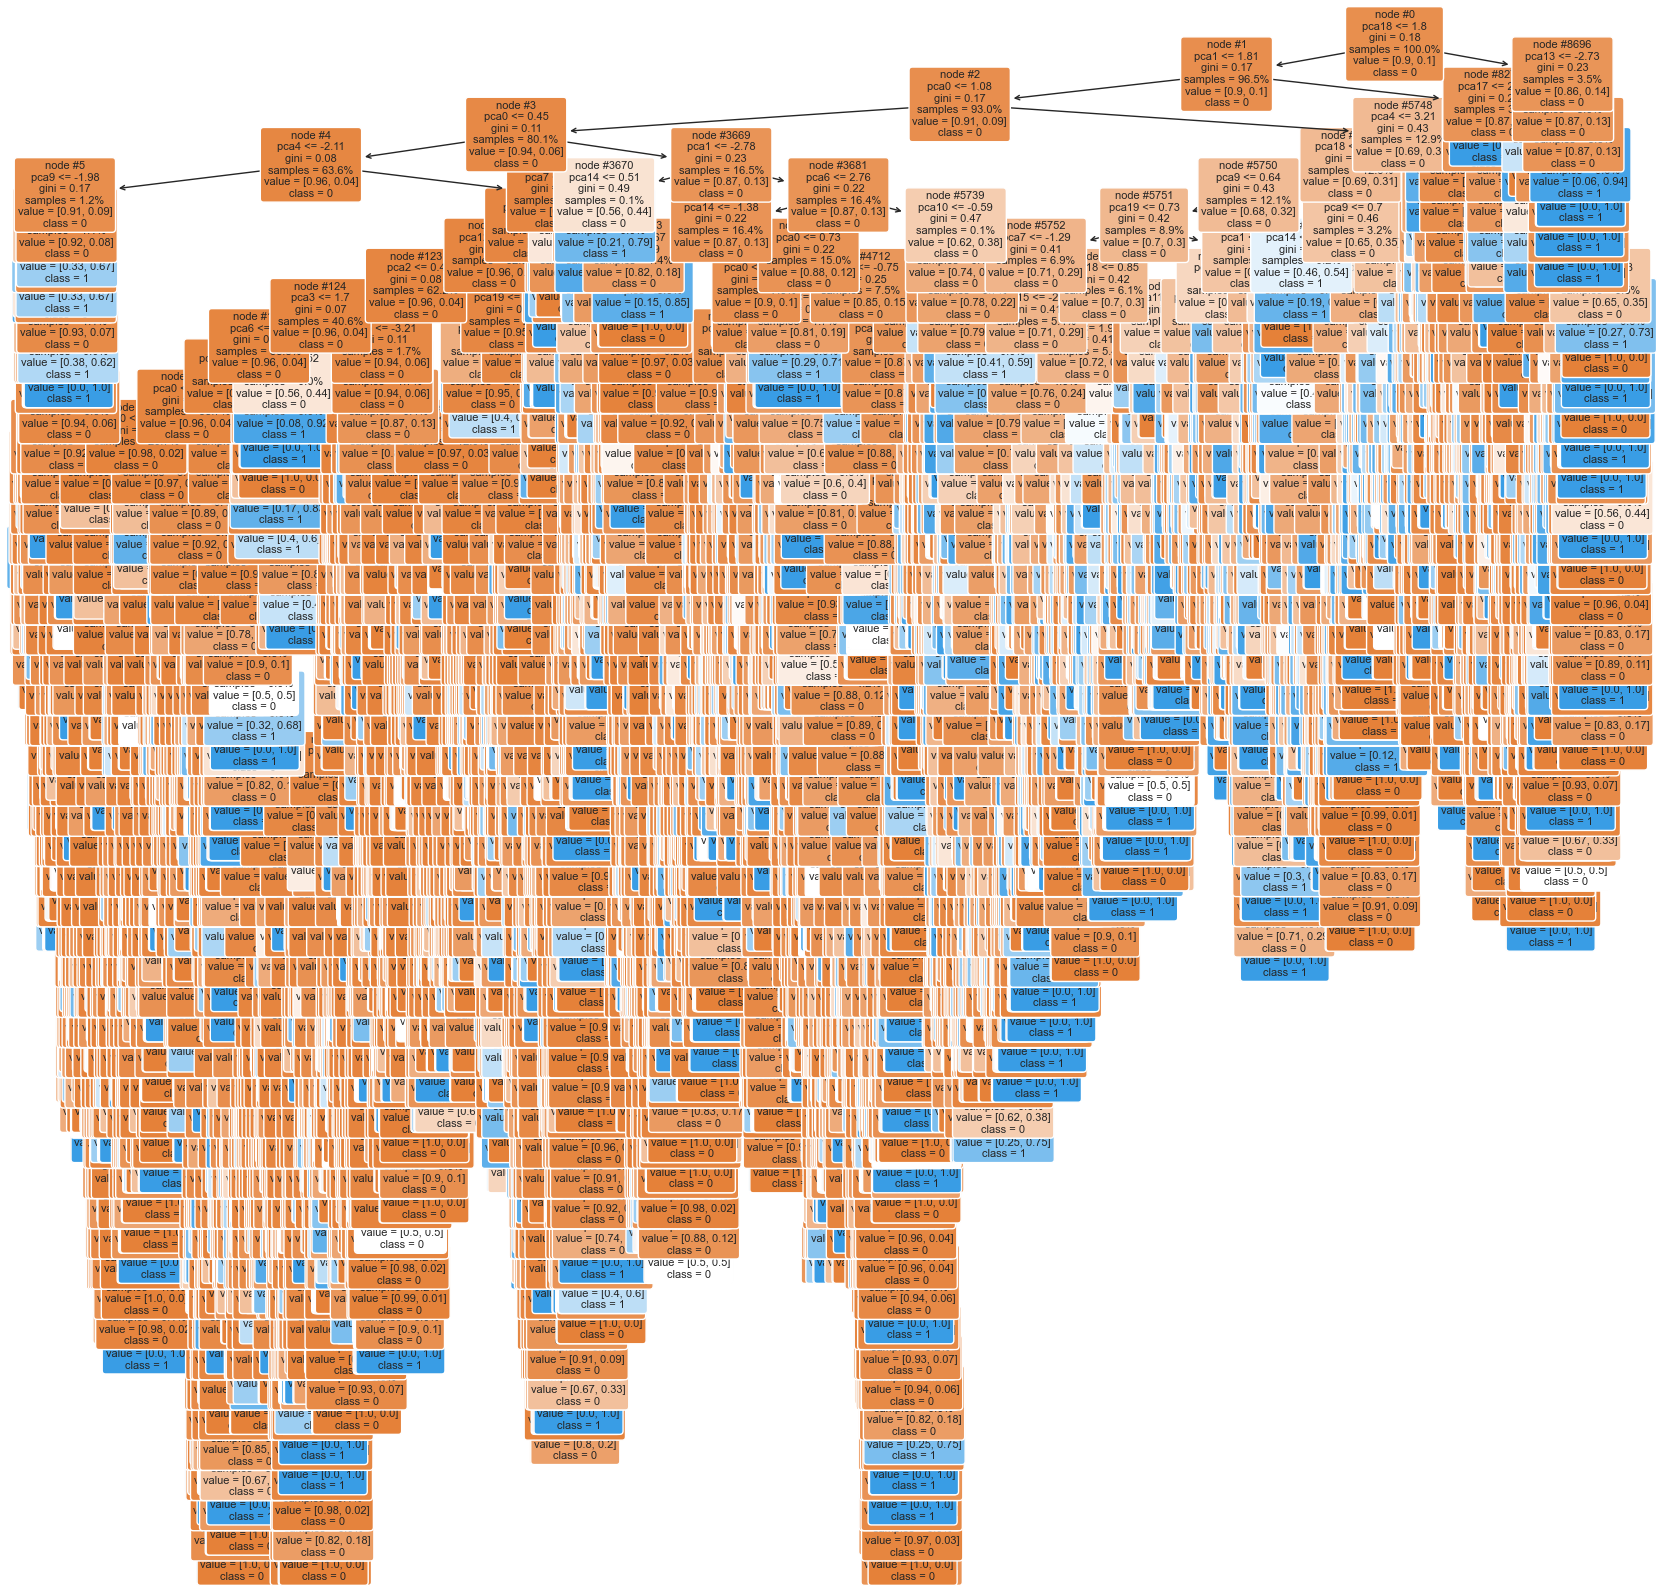

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# impurity=True shows the impurity measure at each node,
# proportion=False does not show the proportion of samples in each class,
# precision=2 sets the precision of the impurity measure to two decimal places,
# node_ids=True shows the node IDs.
plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[0], feature_names=list(X.columns), class_names=['0', '1'],
          fontsize=8, impurity=True, rounded=True, proportion=True, precision=2, filled=True, node_ids=True)
plt.savefig(f'../images/Random Forest/tree_plot.png',dpi=300, bbox_inches='tight')
plt.show()
